<a href="https://colab.research.google.com/github/bagindawilliams/2D-data-image-processing/blob/main/UTS_Pembelajaran_Mendalam_untuk_Teknik_Elektro_Soal_2_Baginda_Miraj_Williamsyah_201012320010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


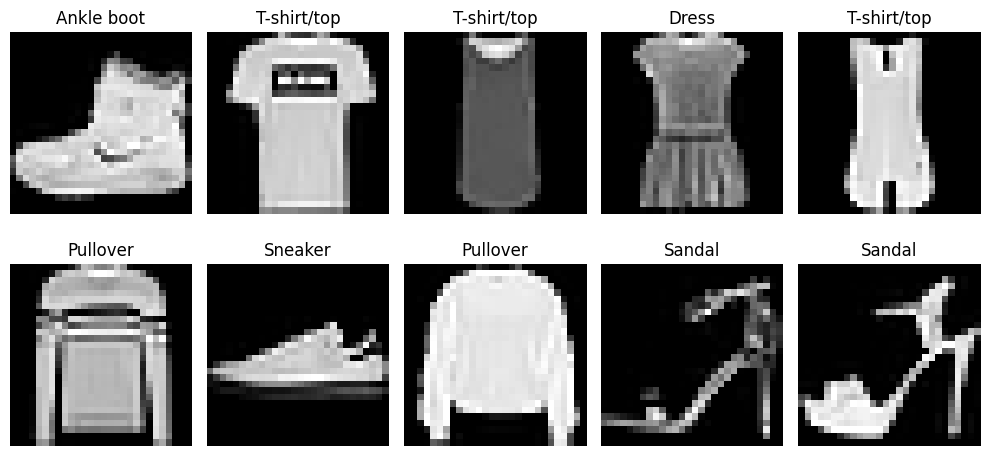

In [ ]:
# Import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print dataset information
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

# Mapping label names for better understanding
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display first 10 images with labels
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(label_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


# Pre-Processing Data

Setelah preprocessing:
- Dimensi x_train: (48000, 28, 28, 1)
- Dimensi x_val: (12000, 28, 28, 1)
- Dimensi x_test: (10000, 28, 28, 1)
- Dimensi y_train: (48000,)
- Dimensi y_val: (12000,)
- Dimensi y_test: (10000,)


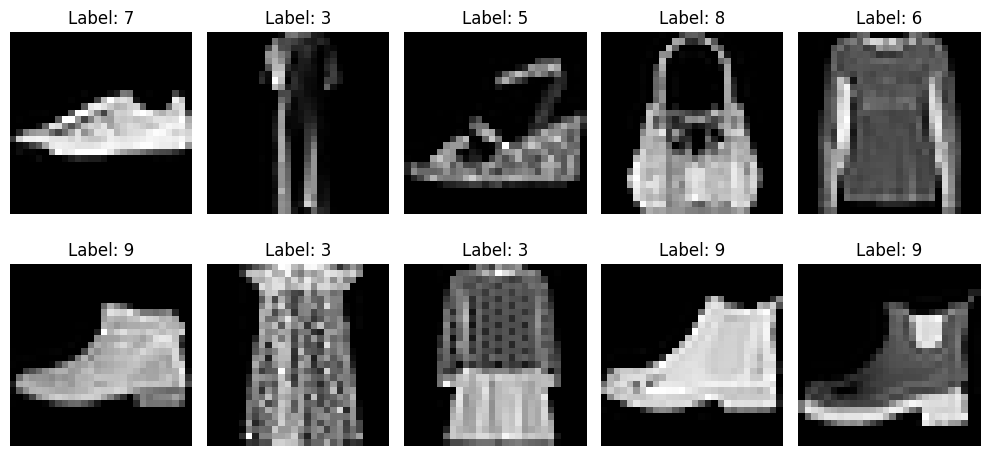

In [ ]:
# Normalisasi Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Tambahkan dimensi channel (reshape data)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Membagi data pelatihan menjadi train dan validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Output informasi dataset setelah preprocessing
print("Setelah preprocessing:")
print(f"- Dimensi x_train: {x_train.shape}")
print(f"- Dimensi x_val: {x_val.shape}")
print(f"- Dimensi x_test: {x_test.shape}")
print(f"- Dimensi y_train: {y_train.shape}")
print(f"- Dimensi y_val: {y_val.shape}")
print(f"- Dimensi y_test: {y_test.shape}")

# Menampilkan contoh gambar setelah preprocessing
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Reshape untuk menampilkan gambar asli
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Membuat Model Deep Learning



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 1. Membangun arsitektur model CNN
model = Sequential([
    # Layer 1: Convolutional + ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),  # Layer Pooling untuk pengurangan dimensi

    # Layer 2: Convolutional + ReLU
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),  # Pooling layer kedua

    # Layer 3: Flatten dan Fully Connected Layers
    Flatten(),  # Mengubah data dari 2D ke 1D
    Dense(128, activation='relu'),  # Layer fully connected
    Dropout(0.5),  # Dropout untuk mencegah overfitting
    Dense(10, activation='softmax')  # Layer output dengan 10 kelas
])

# 2. Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 3. Ringkasan model
print("Ringkasan Arsitektur Model:")
model.summary()

# 4. Pelatihan model
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    batch_size=32)

# 5. Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi Model pada Data Uji: {test_acc:.2f}")


Ringkasan Arsitektur Model:


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 36ms/step - accuracy: 0.7055 - loss: 0.8197 - val_accuracy: 0.8557 - val_loss: 0.3897
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8474 - loss: 0.4179 - val_accuracy: 0.8818 - val_loss: 0.3199
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.8710 - loss: 0.3588 - val_accuracy: 0.8876 - val_loss: 0.3048
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.8889 - loss: 0.3119 - val_accuracy: 0.8900 - val_loss: 0.2883
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8940 - loss: 0.2907 - val_accuracy: 0.9016 - val_loss: 0.2637
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 33ms/step - accuracy: 0.8991 - loss: 0.2730 - val_accuracy: 0.9013 - val_loss: 0.2628
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9069 - loss: 0.2522 - val_accuracy: 0.9098 - val_loss: 0.2493
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9101 -

# Analisis Performa dan Evaluasi Model

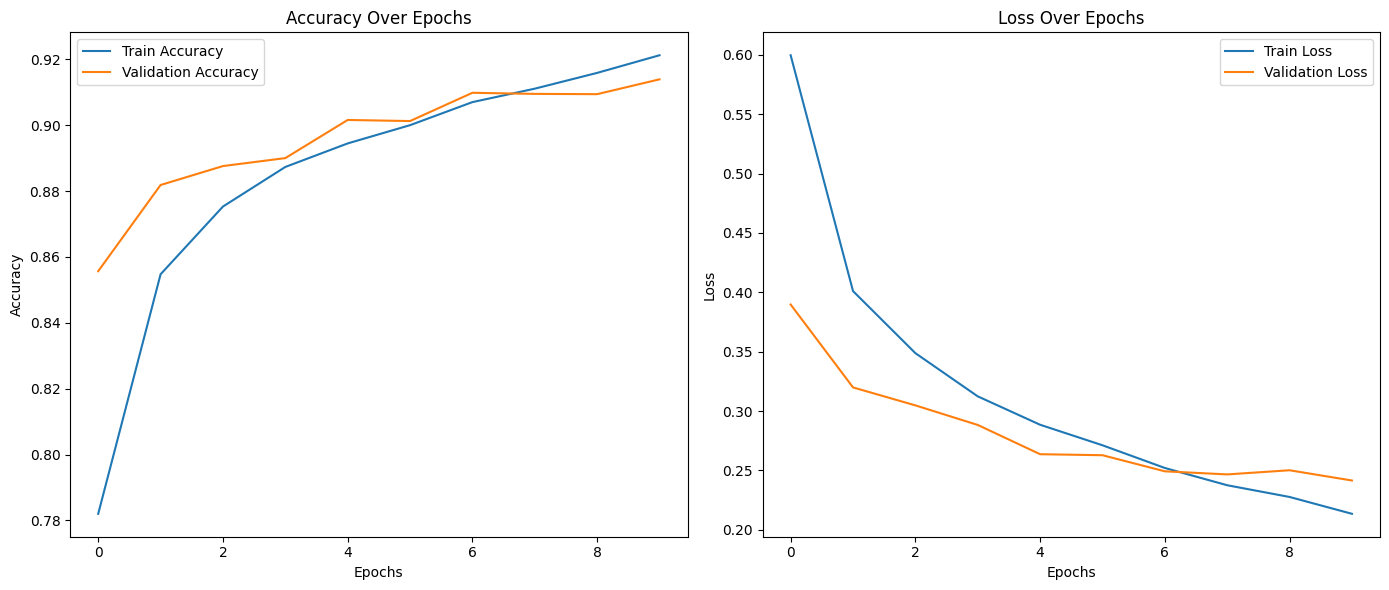

313/313 - 2s - 8ms/step - accuracy: 0.9083 - loss: 0.2529

Akurasi Model pada Data Uji: 0.91
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


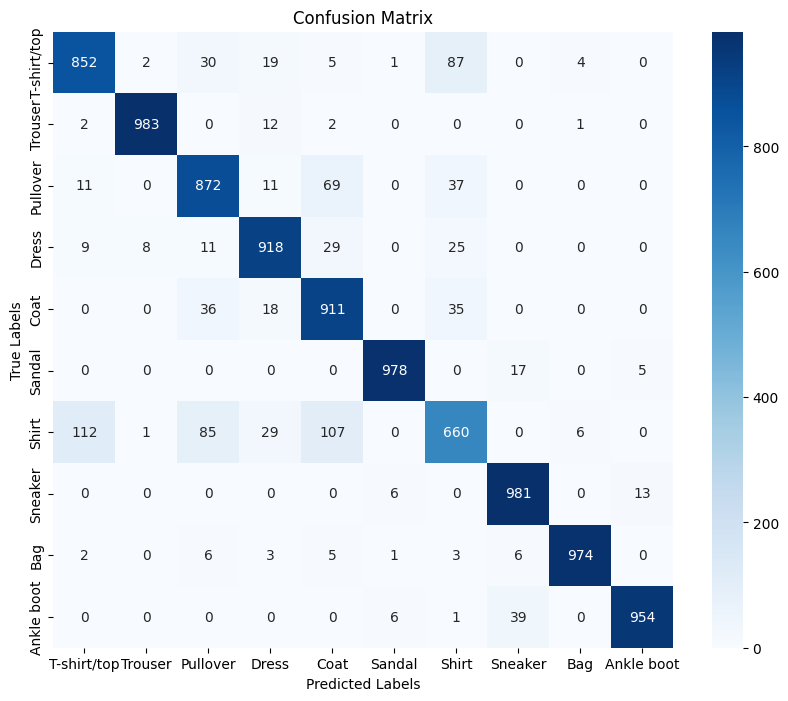


Laporan Klasifikasi:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.85      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.84      0.87      0.85      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.81      0.91      0.86      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.78      0.66      0.71      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



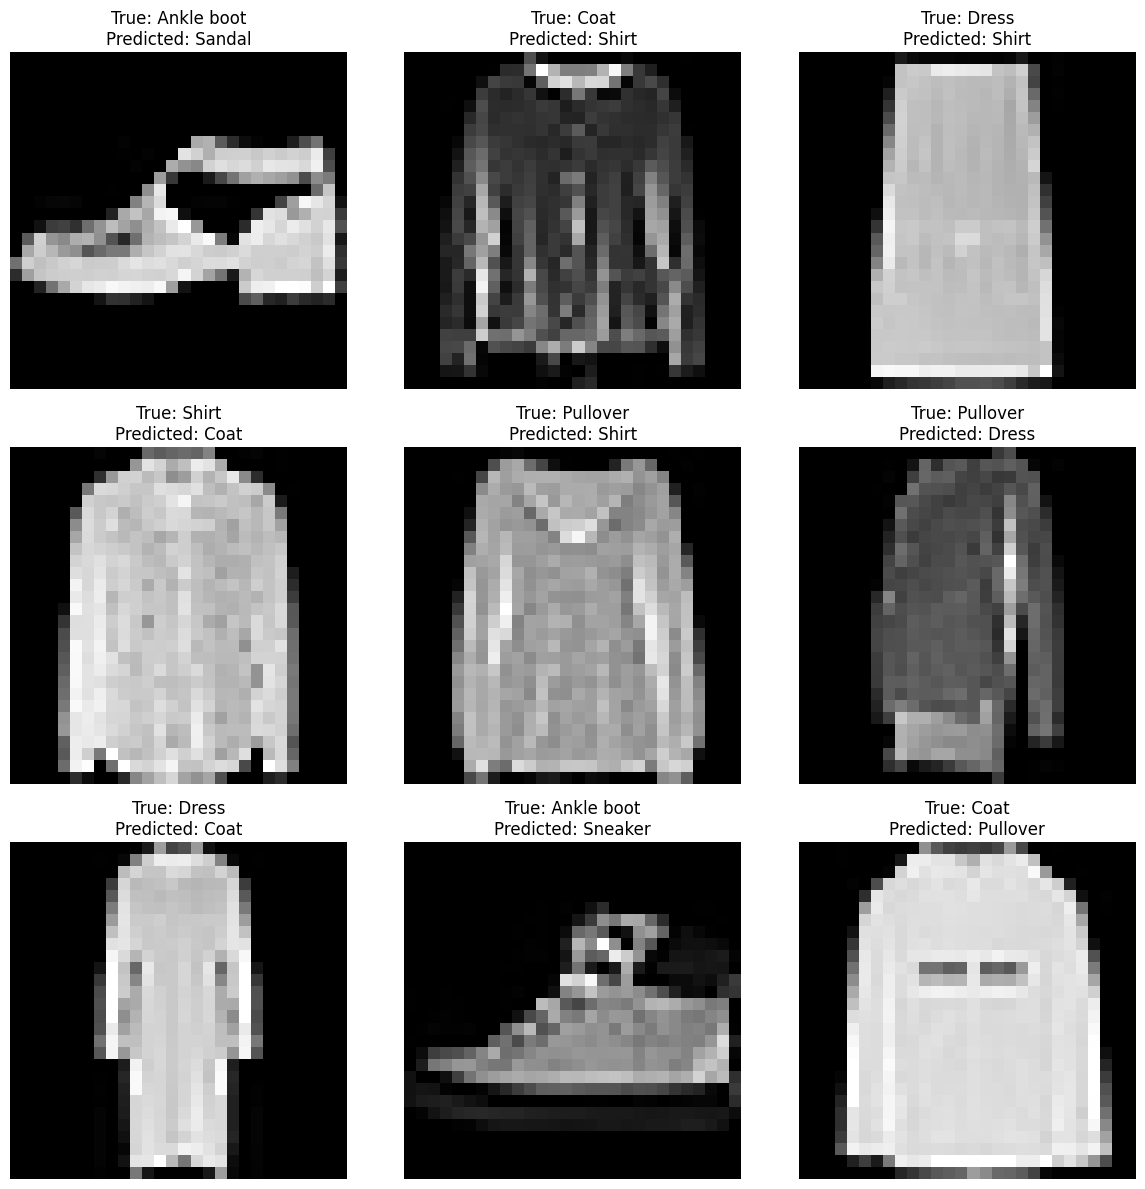

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Visualisasi Akurasi dan Loss Selama Pelatihan
def plot_performance(history):
    # Plot akurasi
    plt.figure(figsize=(14, 6))

    # Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_performance(history)

# 2. Evaluasi Model pada Data Uji
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi Model pada Data Uji: {test_acc:.2f}")

# 3. Membuat Prediksi pada Data Uji
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Konversi probabilitas menjadi kelas prediksi

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 5. Laporan Klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_classes, target_names=label_names))

# 6. Visualisasi Kesalahan Prediksi
def plot_misclassified_images(x_test, y_test, y_pred_classes, label_names):
    misclassified = np.where(y_test != y_pred_classes)[0]
    plt.figure(figsize=(12, 12))
    for i, idx in enumerate(misclassified[:9]):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {label_names[y_test[idx]]}\nPredicted: {label_names[y_pred_classes[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_misclassified_images(x_test, y_test, y_pred_classes, label_names)


# Meningkatkan Model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 1. Augmentasi Data
datagen = ImageDataGenerator(
    rotation_range=15,        # Rotasi hingga 15 derajat
    width_shift_range=0.1,    # Pergeseran horizontal hingga 10%
    height_shift_range=0.1,   # Pergeseran vertikal hingga 10%
    zoom_range=0.1,           # Zoom in/out hingga 10%
    horizontal_flip=True      # Membalik gambar secara horizontal
)

datagen.fit(x_train)  # Melakukan augmentasi pada data pelatihan

# 2. Membuat Model CNN yang Lebih Kompleks
model = Sequential([
    # Layer 1: Convolutional + Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Layer 2: Convolutional + Pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Layer 3: Convolutional + Pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully Connected Layers
    Flatten(),
    Dense(256, activation='relu'),  # Menambah jumlah neuron
    Dropout(0.5),
    Dense(10, activation='softmax')  # Layer output untuk klasifikasi 10 kelas
])

# 3. Kompilasi Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 5. Melatih Model dengan Augmentasi Data
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),  # Data augmentasi
    epochs=50,                                     # Pelatihan hingga 50 epoch
    validation_data=(x_val, y_val),
    callbacks=[early_stopping],                    # Early stopping untuk menghemat waktu
    verbose=1
)

# 6. Evaluasi Model pada Data Uji
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi Model pada Data Uji: {test_acc:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


750/750 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.4438 - loss: 1.4720 - val_accuracy: 0.7403 - val_loss: 0.6893
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.6957 - loss: 0.8247 - val_accuracy: 0.7610 - val_loss: 0.6165
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 93ms/step - accuracy: 0.7276 - loss: 0.7395 - val_accuracy: 0.7711 - val_loss: 0.5883
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 90ms/step - accuracy: 0.7402 - loss: 0.7053 - val_accuracy: 0.8039 - val_loss: 0.5343
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 91ms/step - accuracy: 0.7515 - loss: 0.6673 - val_accuracy: 0.8137 - val_loss: 0.5063
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.7584 - loss: 0.6524 - val_accuracy: 0.8048 - val_loss: 0.5111
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.7701 - loss: 0.6186 - val_accuracy: 0.8232 - val_loss: 0.4676
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.7724 - loss: 0.6114 - val_accurac

# Menyimpan dan Menggunakan Model

Model telah disimpan sebagai 'fashion_mnist_cnn_model.h5'.


Model telah dimuat kembali dari 'fashion_mnist_cnn_model.h5'.
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
313/313 - 3s - 9ms/step - accuracy: 0.8559 - loss: 0.3964

Akurasi Model yang Dimuat pada Data Uji: 0.86


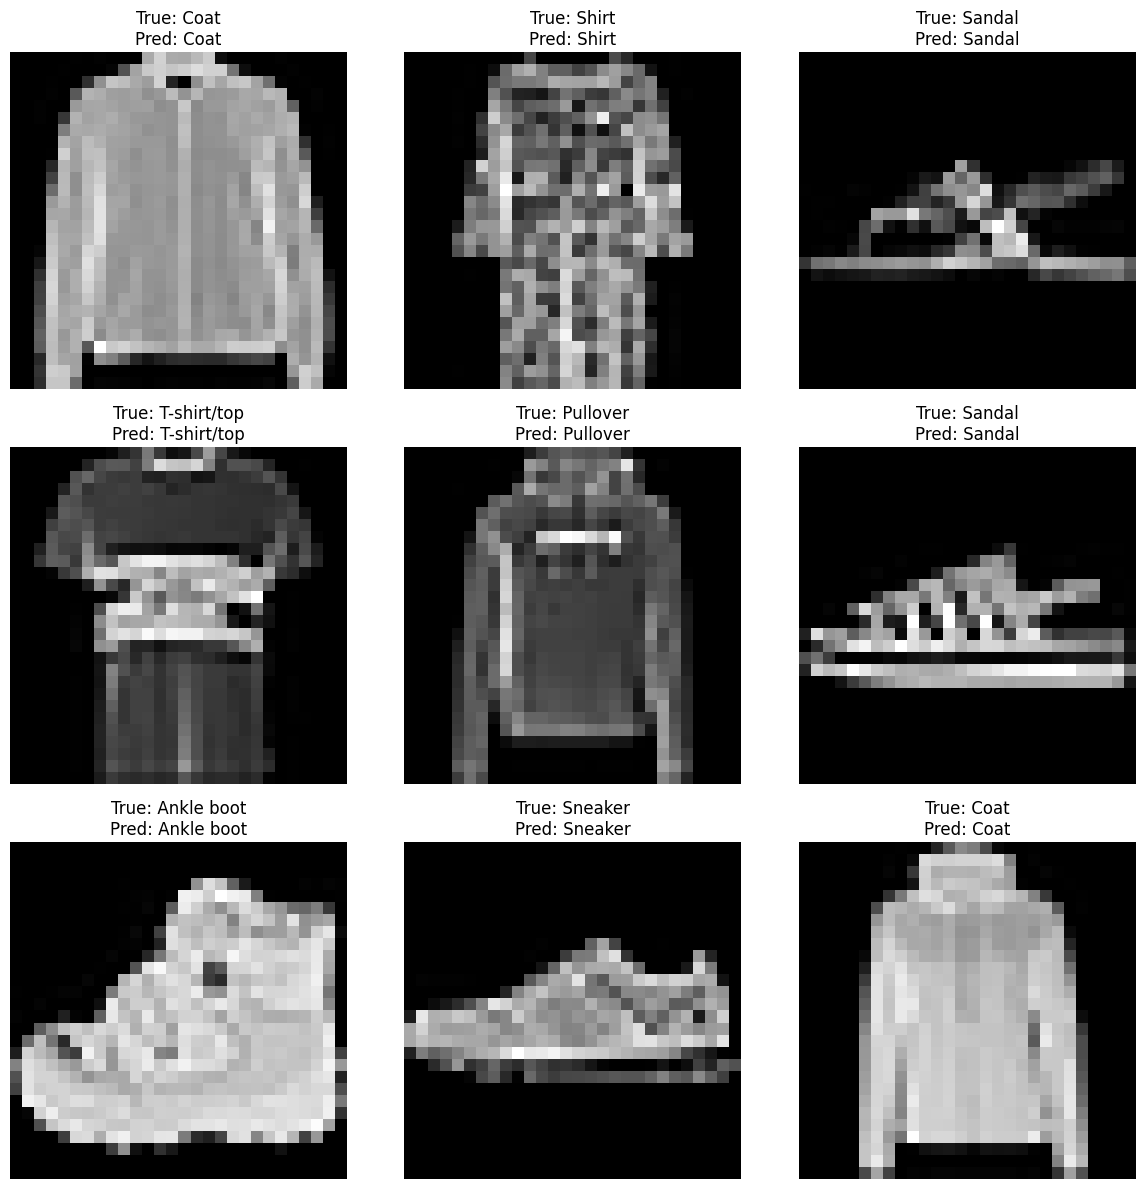

In [ ]:
# Menyimpan model ke file
model.save('fashion_mnist_cnn_model.h5')
print("Model telah disimpan sebagai 'fashion_mnist_cnn_model.h5'.")

# Memuat model dari file
from tensorflow.keras.models import load_model

loaded_model = load_model('fashion_mnist_cnn_model.h5')
print("Model telah dimuat kembali dari 'fashion_mnist_cnn_model.h5'.")

# Membuat prediksi menggunakan model yang dimuat
y_pred_loaded = loaded_model.predict(x_test)
y_pred_classes_loaded = np.argmax(y_pred_loaded, axis=1)

# Evaluasi model yang dimuat
test_loss, test_acc = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi Model yang Dimuat pada Data Uji: {test_acc:.2f}")


# Menampilkan gambar dengan prediksi model yang dimuat
def visualize_predictions(x_data, y_true, y_pred, label_names, num_images=9):
    plt.figure(figsize=(12, 12))
    indices = np.random.choice(range(len(x_data)), num_images, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {label_names[y_true[idx]]}\nPred: {label_names[y_pred[idx]]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(x_test, y_test, y_pred_classes_loaded, label_names)


# Fine Tunning Model


In [ ]:
from tensorflow.keras.regularizers import l2

# Membuat model dengan regularisasi L2
model = Sequential([
    # Layer 1: Convolutional + Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Layer 2: Convolutional + Pooling
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Layer 3: Convolutional + Pooling
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Fully Connected Layers dengan Regularisasi L2
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    Dense(10, activation='softmax', kernel_regularizer=l2(0.001))
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate jika validation loss tidak membaik
lr_scheduler = ReduceLROnPlateau(monitor='val_loss',
                                 factor=0.5,
                                 patience=3,
                                 min_lr=1e-6,
                                 verbose=1)


In [ ]:
# Melatih ulang model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, lr_scheduler],
    verbose=1
)


Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.4344 - loss: 1.6044 - val_accuracy: 0.7422 - val_loss: 0.7770 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.6850 - loss: 0.9243 - val_accuracy: 0.7499 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.7152 - loss: 0.8244 - val_accuracy: 0.7673 - val_loss: 0.6449 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 69s 92ms/step - accuracy: 0.7296 - loss: 0.7802 - val_accuracy: 0.7887 - val_loss: 0.6097 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 95ms/step - accuracy: 0.7453 - loss: 0.7380 - val_accuracy: 0.8008 - val_loss: 0.5791 - learning_rate: 0.0010


In [ ]:
# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nAkurasi Model pada Data Uji (Setelah Fine-Tuning): {test_acc:.2f}")


313/313 - 4s - 11ms/step - accuracy: 0.7400 - loss: 0.7863

Akurasi Model pada Data Uji (Setelah Fine-Tuning): 0.74


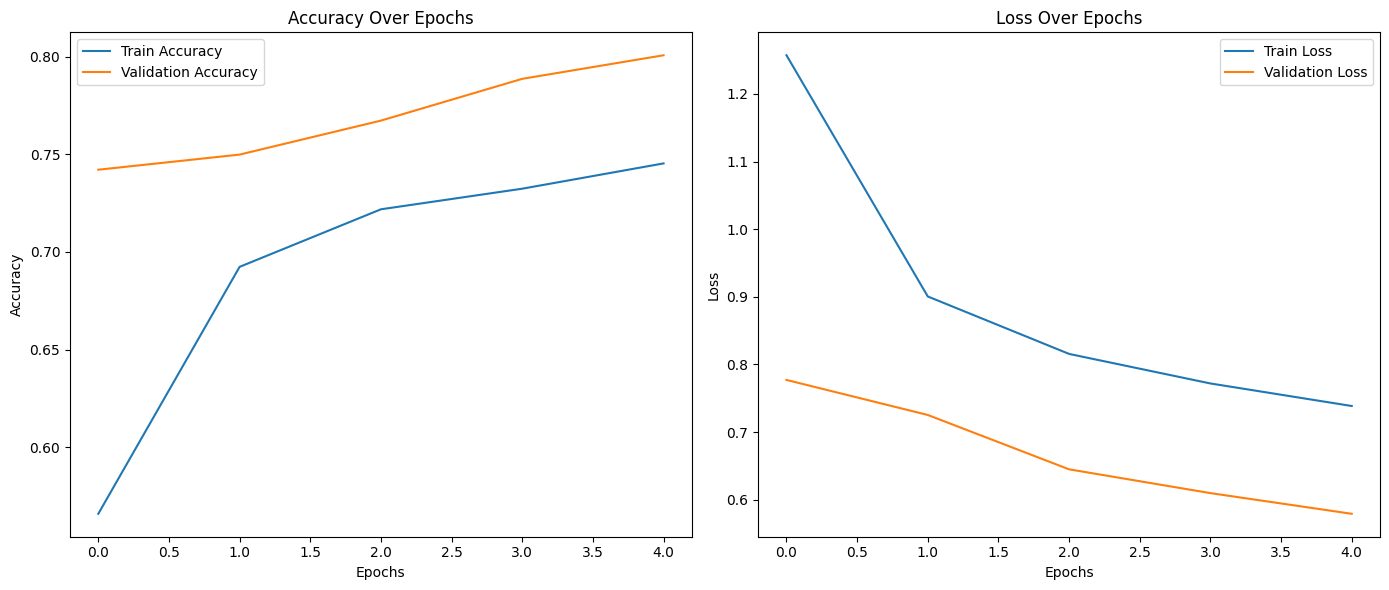

In [ ]:
# Fungsi untuk memvisualisasikan akurasi dan loss
def plot_performance(history):
    plt.figure(figsize=(14, 6))

    # Akurasi
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_performance(history)


# Uji Coba dengan Data Asli dan Data Palsu

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Memuat model yang sudah disimpan
model = load_model('fashion_mnist_cnn_model.h5')
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


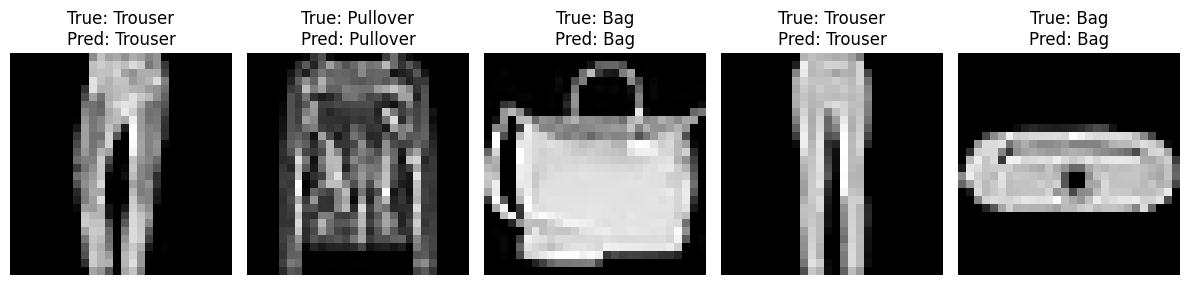

In [ ]:
# Menggunakan data asli dari x_test
def test_real_data(x_data, y_true, label_names, model, num_samples=5):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(range(len(x_data)), num_samples, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
        pred = model.predict(x_data[idx].reshape(1, 28, 28, 1))
        pred_label = label_names[np.argmax(pred)]
        true_label = label_names[y_true[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Uji coba dengan data asli
test_real_data(x_test, y_test, label_names, model, num_samples=5)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


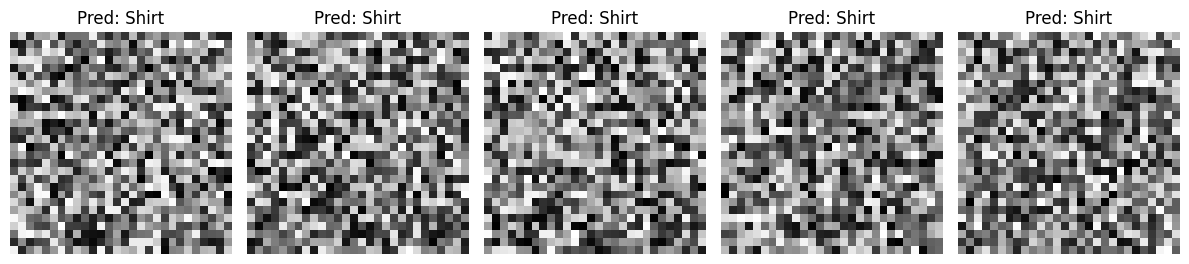

In [ ]:
# Membuat data palsu (gambar grayscale acak)
def create_fake_data(shape=(28, 28)):
    return np.random.randint(0, 255, size=shape).astype('float32') / 255.0

# Uji coba dengan data palsu
def test_fake_data(label_names, model, num_samples=5):
    plt.figure(figsize=(12, 6))

    for i in range(num_samples):
        fake_image = create_fake_data()
        pred = model.predict(fake_image.reshape(1, 28, 28, 1))
        pred_label = label_names[np.argmax(pred)]

        plt.subplot(1, num_samples, i + 1)
        plt.imshow(fake_image, cmap='gray')
        plt.title(f"Pred: {pred_label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Uji coba dengan data palsu
test_fake_data(label_names, model, num_samples=5)
